---
title: Gaussian Processes
layout: collection
permalink: /Machine-Learning/Gaussian-Processes
collection: Machine-Learning
entries_layout: grid
mathjax: true
toc: true
categories:
  - study
tags:
  - mathematics
  - statistics
  - machine-learning 
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

sns.set_theme()

# Gaussian processes

With the use of gaussian processes we are able to git non-linear regression functions with gaussian distributions.



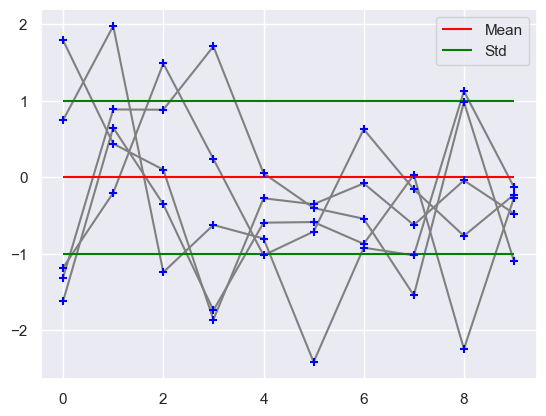

In [107]:
np.random.seed(3)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
norm = stats.multivariate_normal(np.zeros(10), np.eye(10))
x_norm = norm.rvs(size=5)

for row in x_norm:
    plt.scatter(x, row, color='Blue', zorder=10, marker='+')
    plt.plot(x, row, color='gray', zorder=1)
    
    
plt.hlines(xmin=0, xmax=9, y=0, label='Mean', color='red')
plt.hlines(xmin=0, xmax=9, y=[-1, 1], label='Std', color='green')
plt.legend()
plt.show()

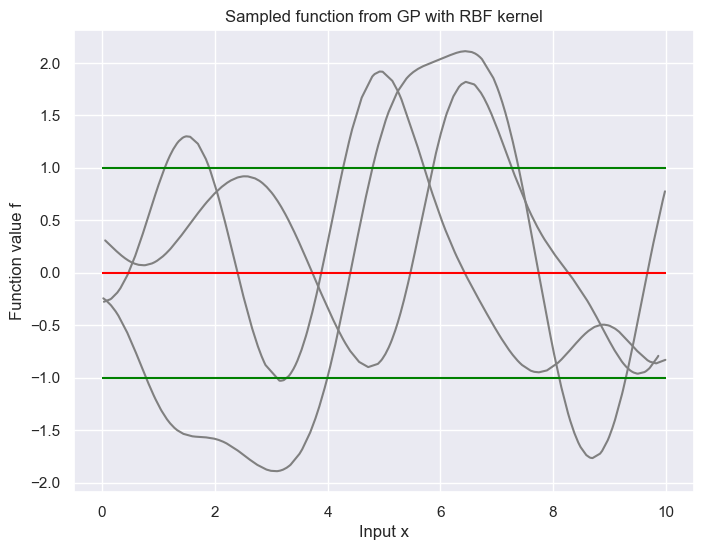

In [106]:
plt.figure(figsize=(8, 6))

for i in range(3):
    np.random.seed(41 + i)
    x = np.random.random(size=200) * 10
    x = np.sort(x)
    
    def covariance_kernel(x1, x2, l=1.):
        return np.exp(-0.5 * (np.linalg.norm(x1 - x2) ** 2) / l**2)
    
    K = np.array([[covariance_kernel(xi, xj) for xi in x] for xj in x])
    f = np.random.multivariate_normal(np.zeros(len(x)), K)
    
    plt.plot(x, f, label='Sampled function', color='gray')
    
plt.hlines(xmin=0, xmax=10, y=0, label='Mean', color='red')
plt.hlines(xmin=0, xmax=10, y=[-1, 1], label='Std', color='green')
plt.xlabel('Input x')
plt.ylabel('Function value f')
plt.title('Sampled function from GP with RBF kernel')
plt.show()

A gaussian RV is given by $f \sim \mathcal{N}(\mu, \sigma^2)$.
A gaussian Random Vector, is a collection of $n$ RVs which is characterized by a mean vector and covariance matrix $ \mathbf{f} \sim \mathcal{N}(\mu, \Sigma) $.
A gaussian process now is an infinite random vector, where every finite subset of this random vector is jointly Gaussian distributed.
Introducing now a continious index, something like a time $t$, would give rise to the function $f(t)$, where $f(t)$ is the limiting object of the Random vector with infinite dimension.
The function f(t) has a mean function given by 

$$
m(t) = \mathbb{E}[f(t)]
$$

and the covariance function given by

$$
k(t, t') = \mathbb{E}[(f(t) - m(t))(f(t') - m(t'))]
$$

Here we use a multidimensional input space $ \mathbb{x} \in \mathbb{R}^d $ instead of the one dimensional input space $t$. 
With this the gaussian process would then be characterized by the mean function $m(\mathbf{x})$ and the covariance function $k(\mathbf{x}, \mathbf{x}')$.
This gives us then the distribution over $ \mathbf{x} $.

$$
f(\mathbf{x}) \sim \mathcal{GP}(m(\mathbf{x}), k(\mathbf{x}, \mathbf{x}'))
$$

## Sampling

When trying to draw, we evaluate the GP at set of $n$ discrete times or input vectors $ \mathbf{x} \in \mathbb{R}^d $.
1. Choose $n$ input points $ \mathbf{x}_i $ at random. This gives us our data matrix $X$.
2. Build the covariance matrix $K(X, X)$ with the covariance function $k(\mathbf{x}_i, \mathbf{x}_j)$.
3. Sample realizations of the Gaussian random vector $ \mathbf{f} \sim \mathcal{N}(\mathbf{0}, K(X, X))$
4. plot $ \mathbf{f}$ as function of inputs.

# Posterior

Looking now at $n$ discrete input locations. 
We partition our set into a set $ \mathbf{f} $ which is evaluated at training points $X$ and $ \mathbf{f}_* $ which is evaluated at test points $X_*$. 
These two are jointly Gaussian.

$$
\begin{pmatrix} \mathbf{f} \\ \mathbf{f}_* \end{pmatrix}
\sim
\mathcal{N} 
\left(
 
\mathbf{0},

\begin{pmatrix} K(X, X) & K(X, X_*) \\ K(X_*, X) & K(X_*, X_*) \end{pmatrix}

\right)
$$

If we now would like to make predictions for the function values of our test points, we would look at the conditional distribution of $ \mathbf{f}_* $, i.e. the posterior.
Because the conditional of a gaussian is again a gaussian and has a closed form we can directly get our conditional distribution.

$$
\mathbb{P}(\mathbf{f}_* | X_*, X, \mathbf{f}(X)) 
= 
\mathcal{N}(K(X_*, X)K(X, X)^{-1} \mathbf{f},
K(X_*, X_*) - K(X_*, X)K(X, X)^{-1} K(X, X_*)
 )
$$

For the onedimensional test case we get the simplified version

$$
\mathbb{P}(f_* | \mathbf{x}_* , X, \mathbf{f}) = \mathcal{N}(\mathbf{k}_*^T K^{-1} \mathbf{f}, k_{**} - \mathbf{k}_*^T K^{-1} \mathbf{k}_*)
$$

If we now add noise to our function value observations, i.e. $y = f( \mathbf{x}) + \eta$ with $\eta \sim \mathcal{N}(0,\sigma^2)$ (noise independent of data).
?This is the initial example of ridge regression?

Our new joint Gaussian now looks like 

$$
\begin{pmatrix} \mathbf{y} \\ \mathbf{f}_* \end{pmatrix} 
\sim
\mathcal{N} \left( 

\mathbf{0},

\begin{pmatrix} K(X, X) + \sigma^2 I & K(X, X_*) \\ K(X_*, X) & K(X_*, X_*) \end{pmatrix}

\right)
$$

The posterior than again is given by

$$
\mathbb{P}(\mathbf{f}_* | X_*, X, \mathbf{f}(X)) 
= 
\mathcal{N}(K(X_*, X)(K(X, X) + \sigma^2 I)^{-1} \mathbf{f},
K(X_*, X_*) - K(X_*, X)(K(X, X) + \sigma^2 I)^{-1} K(X, X_*)
 )
$$

The onedimensional version is then

$$
\mathbb{P}(f_* | \mathbf{x}_* , X, \mathbf{f}) = \mathcal{N}(\mathbf{k}_*^T (K + \sigma^2 I)^{-1} \mathbf{f}, k_{**} - \mathbf{k}_*^T (K + \sigma^2 I)^{-1} \mathbf{k}_*)
$$

Compared to our previously derived kernel ridge regression the mean of the GP has the same form as the ridge. 
In addition the GP gives us the variance, i.e. the uncertainty of the prediction.

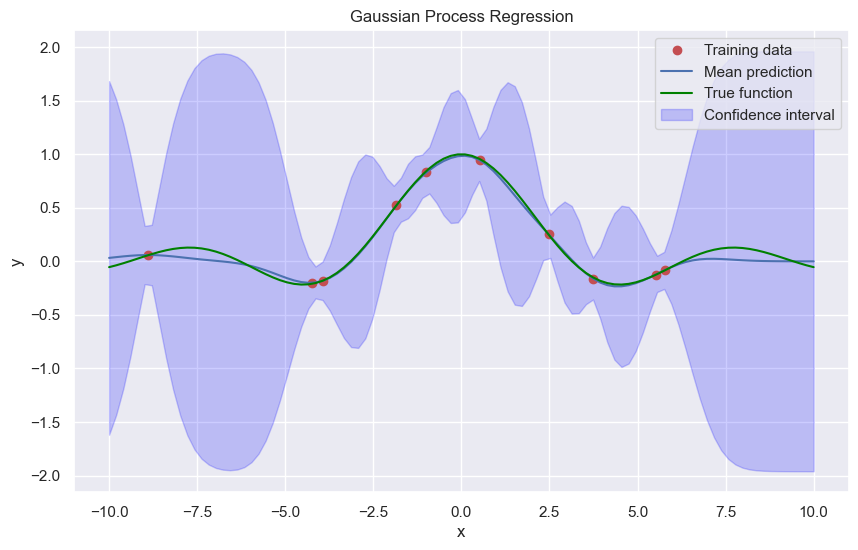

In [202]:
# Example data
np.random.seed(40)
x_train = np.random.uniform(-10, 10, 10)
y_train = np.sin(x_train) / x_train + np.random.normal(0, 0.01, len(x_train))
x_test = np.linspace(-10, 10, 100)

def covariance_kernel(x1, x2, l=1.):
    
        return np.exp(-0.5 * (np.linalg.norm(x1 - x2) ** 2) / l**2)

sigma2 = 0.1**2 

K = np.array([[covariance_kernel(xi, xj) for xi in x_train] for xj in x_train]) + sigma2 * np.eye(x_train.shape[0])
K_s = np.array([[covariance_kernel(xi, xj) for xi in x_test] for xj in x_train])
K_ss = np.array([[covariance_kernel(xi, xj) for xi in x_test] for xj in x_test])

# Compute the mean prediction
K_inv = np.linalg.inv(K)
f_pred_mean = K_s.T.dot(K_inv).dot(y_train)

noise = K_ss - K_s.T.dot(K_inv).dot(K_s)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, 'ro', label='Training data')
plt.plot(x_test, f_pred_mean, 'b-', label='Mean prediction')
plt.plot(x_test, np.sin(x_test) / x_test, color='green', label='True function')
plt.fill_between(x_test, f_pred_mean - 1.96 * np.sqrt(np.diag(noise)), f_pred_mean + 1.96 * np.sqrt(np.diag(noise)), alpha=0.2, color='blue', label='Confidence interval')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()



A GP specfies a disribution over functions $ f(\mathbf{x}) $, characterized by mean function $m(\mathbf{x})$ and covariance function $k(\mathbf{x}_i, \mathbf{x}_j)$.
Because covariance matrices are symmetric positive definit

$$
K_{ij} = K_{ji} \quad  \text{and} \quad \mathbf{x}^T K \mathbf{x} \geq 0,  \ \forall \mathbf{x}
$$

Because Mercer kernels also have this property, all mercer kernels define a proper covariance function in GPs.
Kernel functions often have additional parameters which define them.

The question is now, how these parameters of the kernel functions and the variance of the noise should be chosen?

# Model selection

Looking at the gaussian RBF kernels, these have a free choosable parameter $I$ which is the so called length scale.
Larger length scale values smooth the function values ($\rightarrow$ linear) while smaller ones localize the function values (more 'hills')

How do we now select our parameters?

Look at the marginal likelihood and choose the parameters that maximize the marginal likelihood.

$$
\mathbb{P}(\mathbf{y} | X) = \int \mathbb{P}(\mathbf{y} | \mathbf{f}, X) \mathbb{P}(\mathbf{f} | X) d \mathbf{f}
$$

Because we know that $ \mathbf{y} = \mathbf{f} + \eta$ and $ \mathbf{f} | X \sim \mathcal{N}(\mathbf{0}, K) $ we then get our marginal

$$
\mathbf{y} | X \sim \mathcal{N}(\mathbf{0}, K + \sigma^2 I)
$$

We can find the optimal parameters through derivating the marginal likelihood and using gradient descent to find the optimal.

The log marginal likelihood is now given by  

$$
\log \mathcal{N}(\mathbf{0}, K + \sigma^2 I) = - \frac{1}{2} \mathbf{y}^T (K + \sigma^2 I)^{-1} \mathbf{y} - \frac{1}{2} \log |K + \sigma^2 I| - \frac{n}{2} \log(2\pi)
$$

The first term is called the data fit, the second the complexity penalty and the third the normalisation constant.

The complexity penalty has high values for small length scales. 
Because for $l \rightarrow 0$ we get that $a \rightarrow 0$ and thus $- \frac{1}{2}  \log|K + \sigma^2 I| \rightarrow \infty$.
Same goes for the data fit for small length scale.

# Classification

In our classification setting in logistic regression we have two target $y \in \{0, 1\}$.
We use a Bernoulli RV with a success probability of $\pi(\mathbf{x}) = \mathbb{P}(1 | \mathbf{x} ) $.
The likelihood is then the product of the outcomes

$$
\mathbb{P}(\mathbf{y} | X, f ) = \prod_{i=1}^n (\pi_f (\mathbf{x}_i ))^{y_i} (1 - \pi_f (\mathbf{x}_i ))^{1 - y_i} 
$$

In linear logistic regression we have our unboundede activation function $f(\mathbf{x} ) = \mathbf{w}^T \mathbf{x} $ which we pass through our logistic transfer function

$$

\sigma(f(\mathbf{x})) = \frac{1}{1+e^{-f(\mathbf{x})}} 
$$

where we set $\pi_f = \sigma(f(\mathbf{x} ))$.
We find then our optimal solution $ \hat{\mathbf{w}}  $ by using gradient based methods to maximize the log posterior.
We can use the kernel trick by expanding $ \mathbf{w} = X^T \mathbf{\alpha}$ and substituting the dor products with the kernel function, which then gives us the so called kernel logistic regression.